# Shuttle Log

Original data available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/148/statlog+shuttle).

## Data acquisition

In [1]:
# Load libraries
import os
import pandas as pd

# Load dataset
df = pd.read_csv(os.path.join('data','shuttle_custom.csv'))
#df = pd.read_csv(os.path.join('shuttle_custom.csv'))

# Preview structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58004 entries, 0 to 58003
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      58004 non-null  int64  
 1   A2      58002 non-null  float64
 2   A3      57999 non-null  float64
 3   A4      58001 non-null  float64
 4   A5      58001 non-null  float64
 5   A6      57999 non-null  float64
 6   A7      58003 non-null  float64
 7   A8      58001 non-null  float64
 8   A9      58004 non-null  int64  
 9   target  58004 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 4.4 MB


In [2]:
# Preview data
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,target
0,50,21.0,77.0,0.0,28.0,0.0,27.0,48.0,22,2
1,55,0.0,92.0,0.0,0.0,26.0,36.0,92.0,56,4
2,53,0.0,82.0,0.0,52.0,-5.0,29.0,30.0,2,1
3,37,0.0,76.0,0.0,28.0,18.0,40.0,48.0,8,1
4,37,0.0,79.0,0.0,34.0,-26.0,43.0,46.0,2,1


In [3]:
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,target
57999,80,0.0,84.0,0.0,-36.0,-29.0,4.0,120.0,116,5
58000,55,0.0,81.0,0.0,-20.0,25.0,26.0,102.0,76,4
58001,55,0.0,77.0,0.0,12.0,-22.0,22.0,65.0,42,4
58002,37,0.0,103.0,0.0,18.0,-16.0,66.0,85.0,20,1
58003,56,2.0,98.0,0.0,52.0,1.0,42.0,46.0,4,4


## Data exploration

In [4]:
# Statistical overview
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,target
count,58004.000000,58002.000000,57999.000000,58001.000000,58001.000000,57999.000000,58003.000000,58001.000000,58004.000000,58004.000000
mean,48.238777,-0.019499,85.348472,0.259668,34.549232,1.608286,37.091702,50.885054,13.933177,1.694849
std,12.238636,77.956689,8.902499,36.521201,21.660569,217.599549,13.111841,21.417895,25.615089,1.351024
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-26739.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,32.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000,7.000000


In [5]:
# Checking distribution of target classes
df.target.value_counts()

# P.S. Note the low value counts of classes 7 and 6. This needs
# to be taken into consideration in the data splitting strategy.

target
1    45588
4     8904
5     3268
3      171
2       50
7       13
6       10
Name: count, dtype: int64

In [6]:
# Reviewing the distribution as a percentage
df.target.value_counts(normalize=True)

target
1    0.785946
4    0.153507
5    0.056341
3    0.002948
2    0.000862
7    0.000224
6    0.000172
Name: proportion, dtype: float64

In [7]:
# Specifying the predictors and target
predictors=['A1','A2','A3','A4','A5','A6','A7','A8','A9']
target = 'target'

In [8]:
# Visual exploration
import seaborn as sns
import matplotlib.pyplot as plt

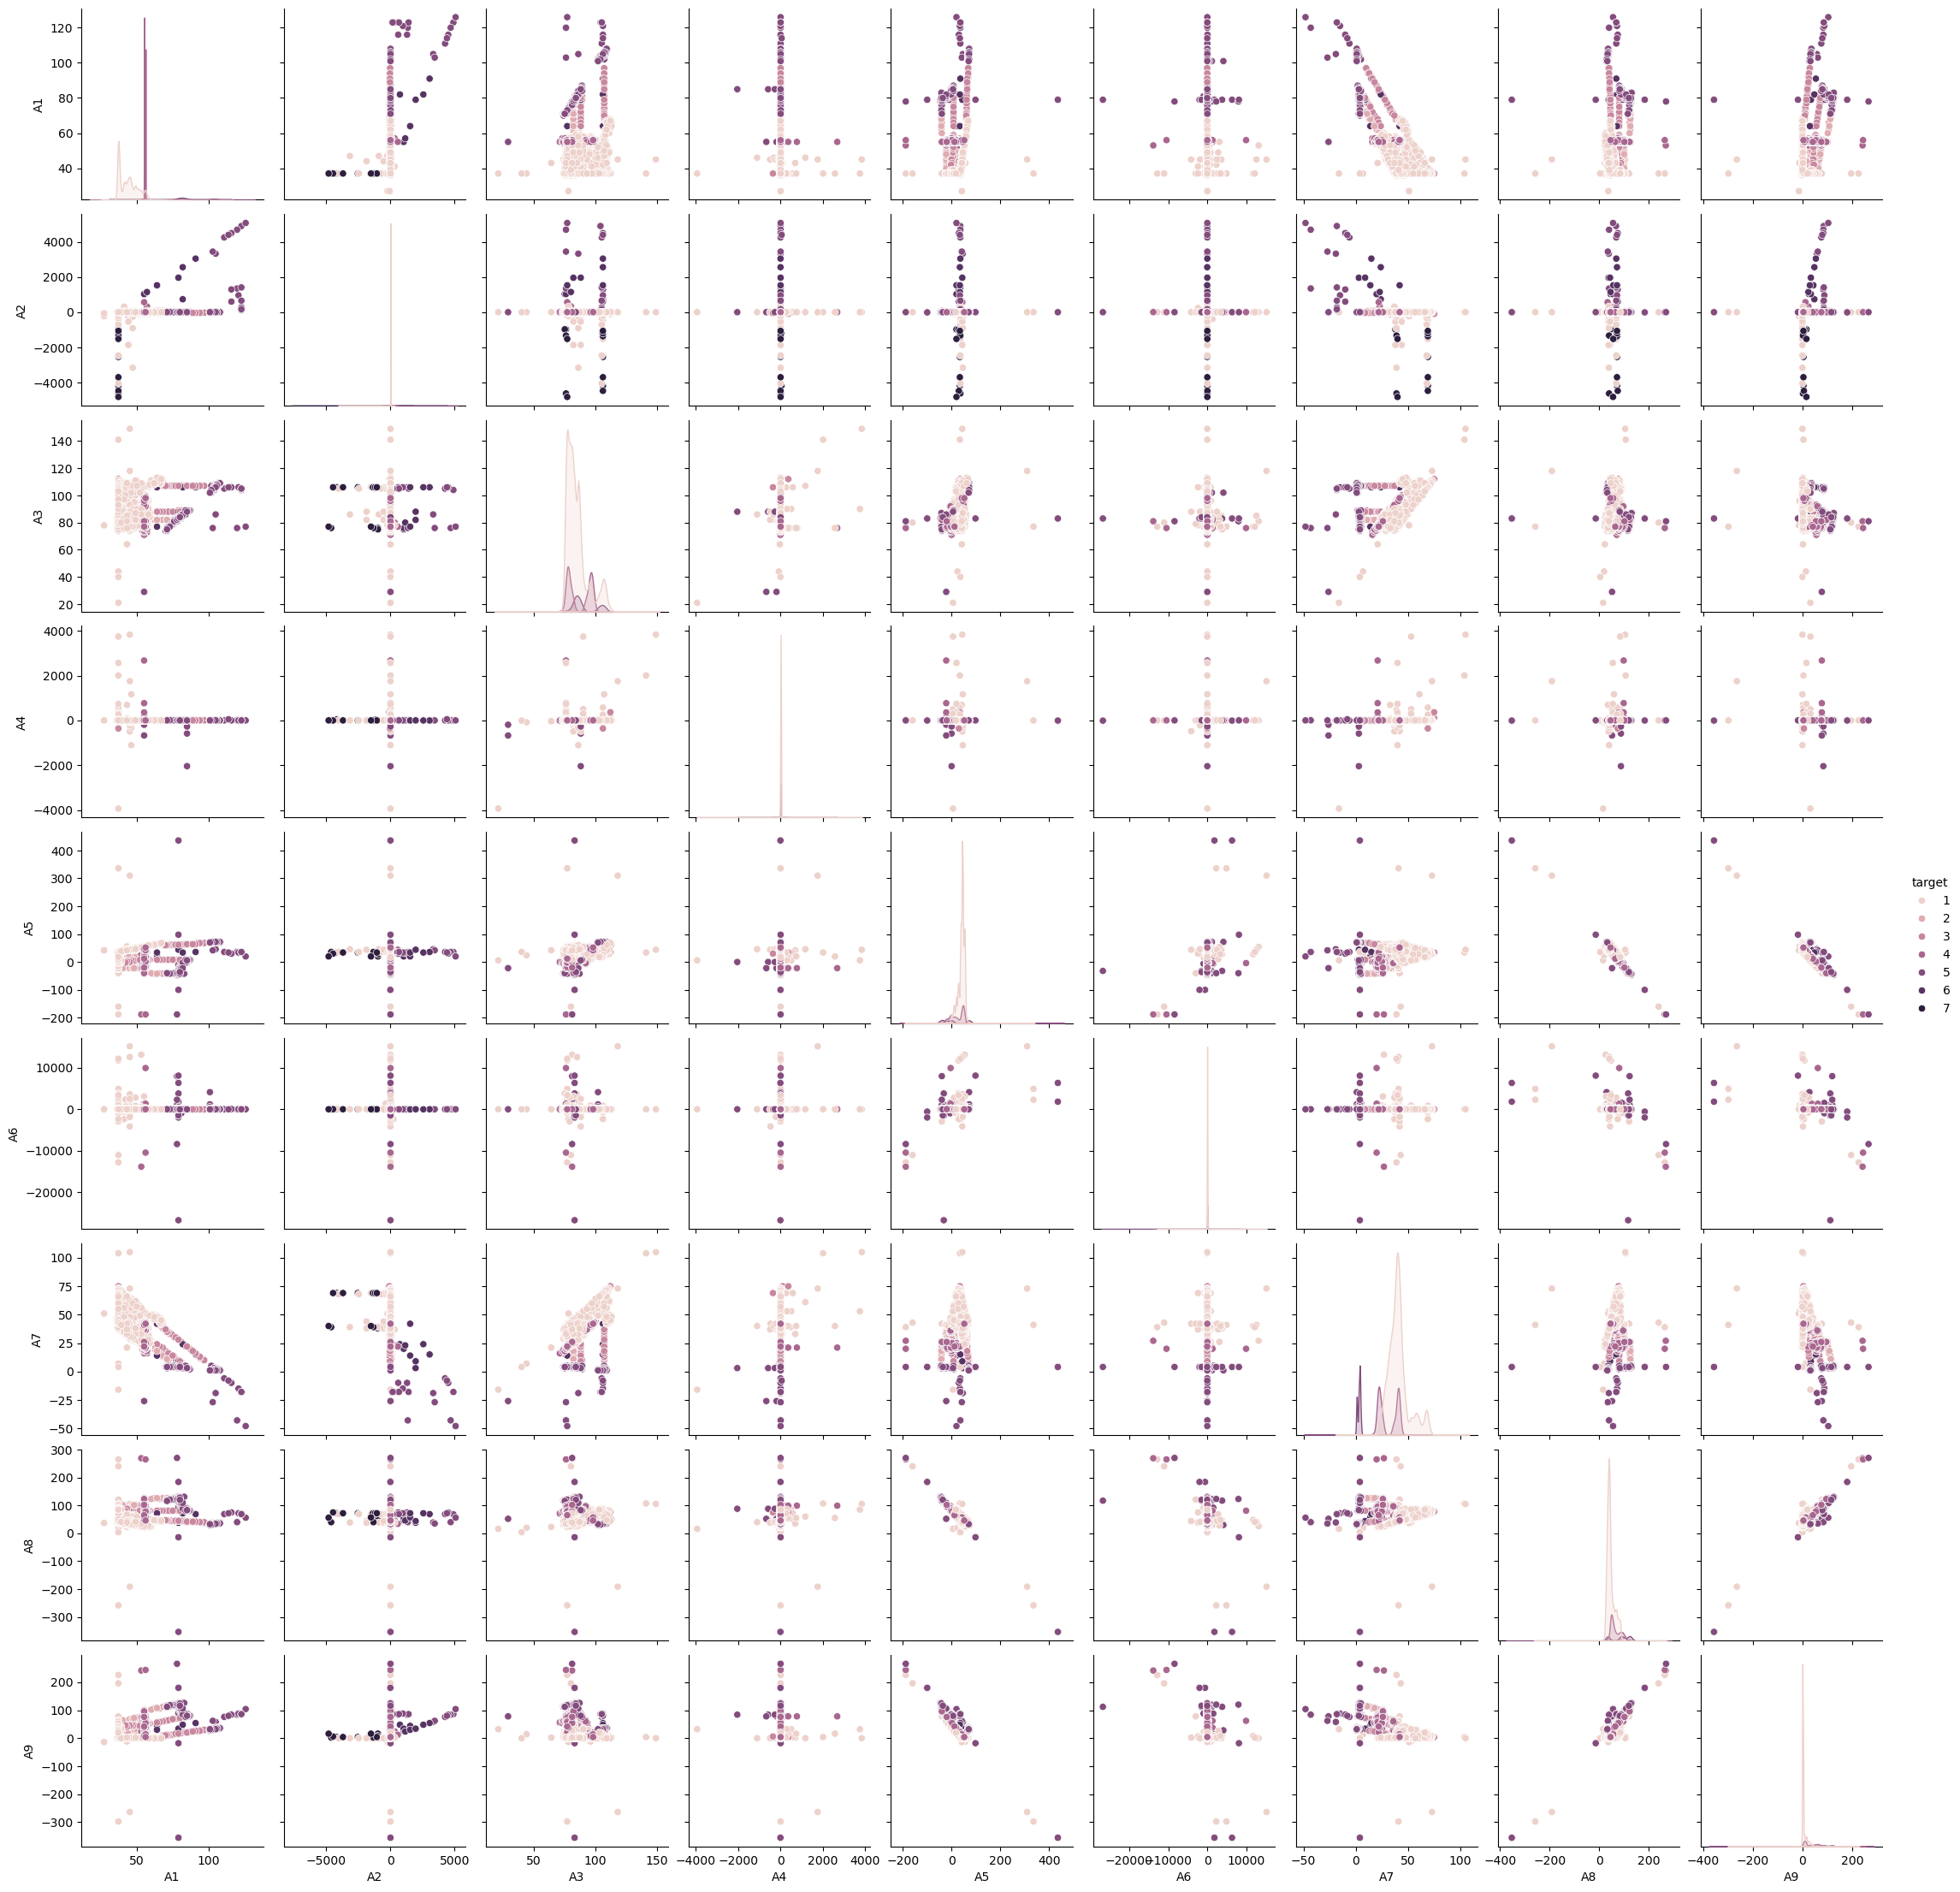

In [9]:
# Check pairplot
sns.pairplot(df, hue=target)
plt.show()

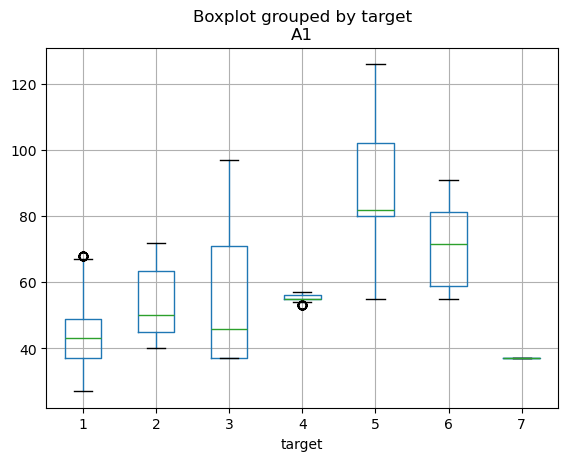

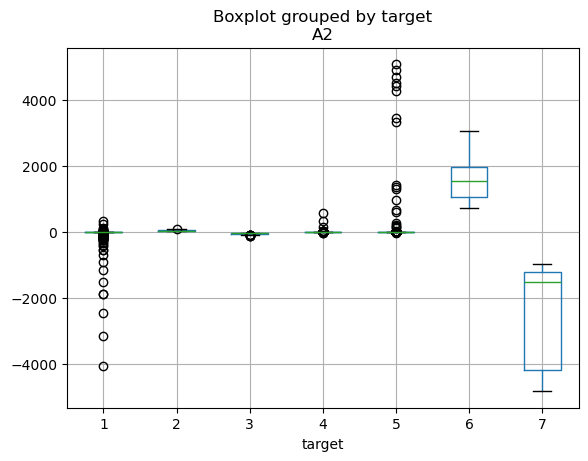

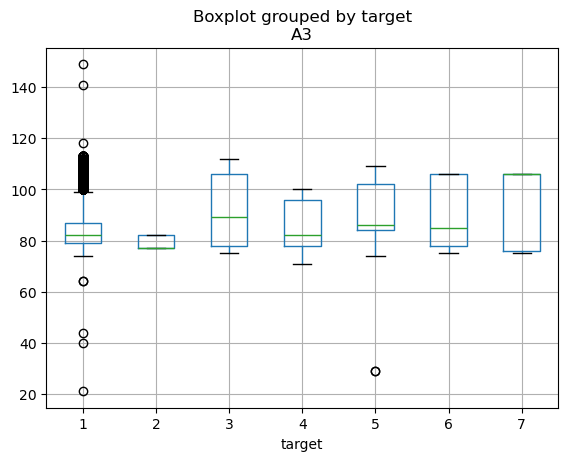

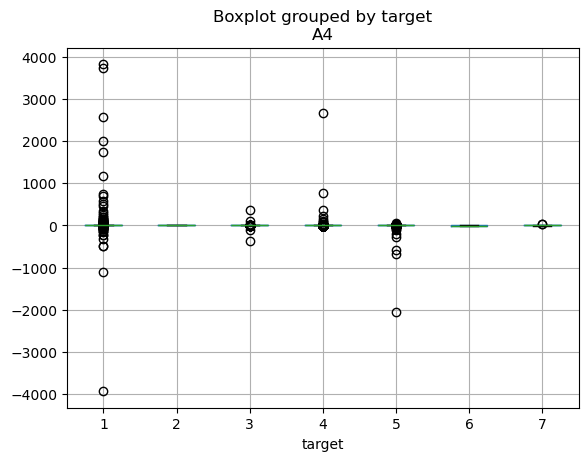

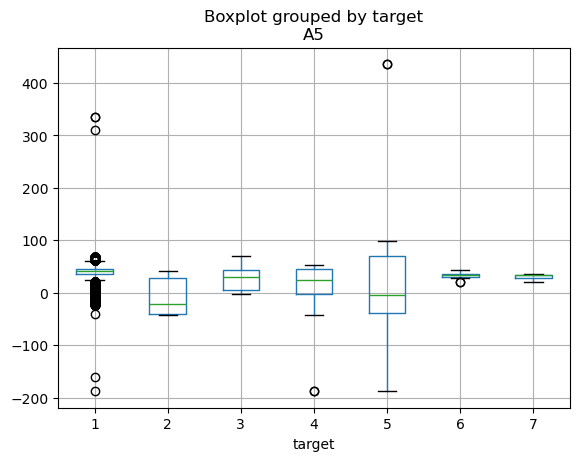

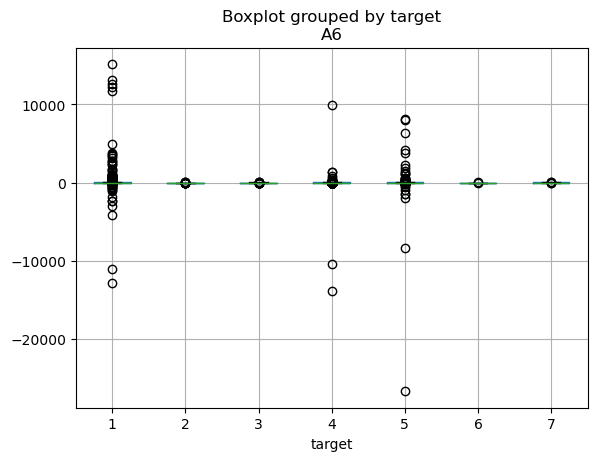

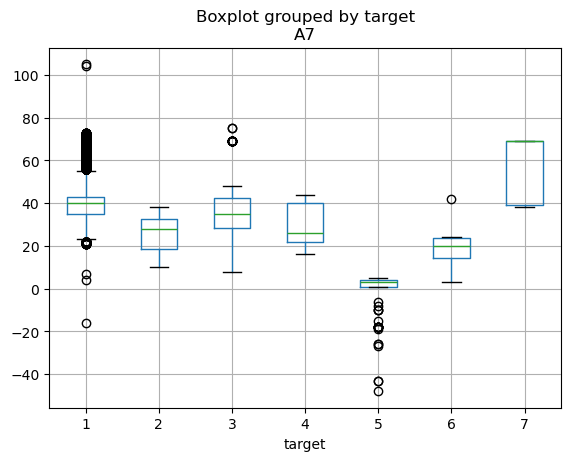

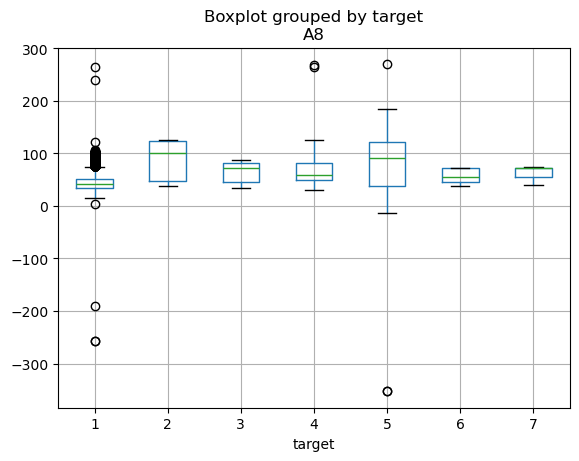

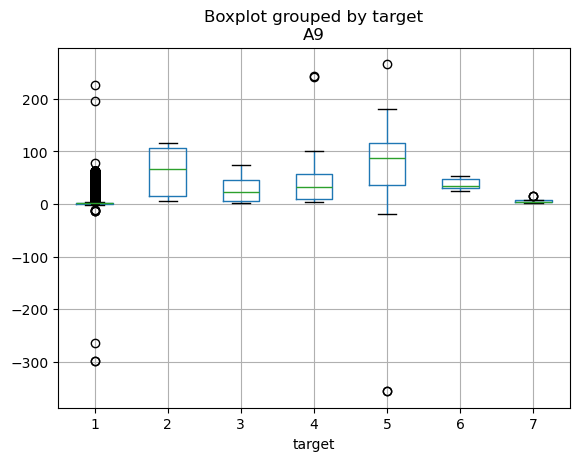

In [10]:
# Check for outliers
for feature in predictors:
    df.boxplot(column=feature, by=target)
    plt.show()

In [11]:
# Check for correlation
df.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,target
A1,1.000000,0.070188,0.263675,-0.007485,-0.052835,-0.000997,-0.756918,0.170364,0.528025,0.737512
A2,0.070188,1.000000,-0.003155,-0.000054,-0.000308,-0.001119,-0.067368,-0.000952,0.033602,0.007820
A3,0.263675,-0.003155,1.000000,0.038120,0.255757,0.001336,0.429599,0.155244,-0.091063,0.144936
A4,-0.007485,-0.000054,0.038120,1.000000,0.005931,0.063958,0.033188,0.009898,-0.008489,-0.003831
A5,-0.052835,-0.000308,0.255757,0.005931,1.000000,0.088550,0.223120,-0.914729,-0.875236,-0.434572
A6,-0.000997,-0.001119,0.001336,0.063958,0.088550,1.000000,0.001954,-0.089148,-0.075047,-0.005106
A7,-0.756918,-0.067368,0.429599,0.033188,0.223120,0.001954,1.000000,-0.054786,-0.556407,-0.594240
A8,0.170364,-0.000952,0.155244,0.009898,-0.914729,-0.089148,-0.054786,1.000000,0.859694,0.509152
A9,0.528025,0.033602,-0.091063,-0.008489,-0.875236,-0.075047,-0.556407,0.859694,1.000000,0.725703
target,0.737512,0.007820,0.144936,-0.003831,-0.434572,-0.005106,-0.594240,0.509152,0.725703,1.000000


## Data pre-processing

### Addressing duplicate rows

In [12]:
# Check for duplicate values
df.duplicated().sum()

np.int64(4)

In [13]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58000 entries, 0 to 58003
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      58000 non-null  int64  
 1   A2      57998 non-null  float64
 2   A3      57995 non-null  float64
 3   A4      57997 non-null  float64
 4   A5      57997 non-null  float64
 5   A6      57995 non-null  float64
 6   A7      57999 non-null  float64
 7   A8      57997 non-null  float64
 8   A9      58000 non-null  int64  
 9   target  58000 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 4.9 MB


### Addressing missing values

In [14]:
# Checking for nulls
df.isnull().sum()

A1        0
A2        2
A3        5
A4        3
A5        3
A6        5
A7        1
A8        3
A9        0
target    0
dtype: int64

In [15]:
# Displaying entries with missing values
df[df.isnull().any(axis=1)]

# P.S. Note that the missing values occur only in 1 predictor
# at a time and across two values of the target variable.

,A1,A2,A3,A4,A5,A6,A7,A8,A9,target
14,41,NaN,100.0,0.0,38.0,-8.0,59.0,61.0,2,1
18,49,3.0,82.0,NaN,50.0,4.0,33.0,33.0,0,1
23,49,0.0,100.0,0.0,50.0,NaN,52.0,51.0,0,1
29,37,0.0,74.0,NaN,26.0,-1.0,38.0,48.0,10,1
33,51,0.0,79.0,0.0,52.0,29.0,28.0,NaN,0,1
34,59,NaN,84.0,0.0,60.0,24.0,25.0,24.0,0,1
37,39,5.0,77.0,0.0,38.0,NaN,37.0,38.0,0,1
47,41,1.0,85.0,0.0,NaN,0.0,44.0,46.0,2,1
49,49,0.0,NaN,1.0,50.0,2.0,46.0,46.0,0,1
54,47,0.0,84.0,4.0,NaN,0.0,38.0,38.0,0,1


In [16]:
predictors_filter = ['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
target_filter = [1, 4]

In [17]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier

# Loop through each combination
for feature in predictors_filter:
    for target_value in target_filter:
        print(f'Processing nulls for target class {target_value} for predictor {feature}')
        # Filter the dataset for the specific target value and split for train and test
        train = df[(df[target]==target_value) & (~df.isnull().any(axis=1))]
        test = df[(df[target]==target_value) & (df[feature].isnull())]

        # It is possible that filtered combination does not have any nulls
        if (test.empty):
            continue

        # Get the list of predictors
        filtered_predictors = list(set(list(df.columns)) - set(target) - set(feature))

        # Split for different dataset
        X_train, y_train = train[filtered_predictors].values, train[feature].values
        X_test, y_test = test[filtered_predictors].values, test[feature].values

        # Train a model
        model = RandomForestClassifier(n_estimators=150, max_depth=10, criterion='entropy').fit(X_train, y_train)

        # Predict
        predictions = model.predict(X_test)

        # Imput values
        df.loc[(df[target]==target_value) & (df[feature].isnull()), feature] = predictions

Processing nulls for target class 1 for predictor A2
Processing nulls for target class 4 for predictor A2
Processing nulls for target class 1 for predictor A3
Processing nulls for target class 4 for predictor A3
Processing nulls for target class 1 for predictor A4
Processing nulls for target class 4 for predictor A4
Processing nulls for target class 1 for predictor A5
Processing nulls for target class 4 for predictor A5
Processing nulls for target class 1 for predictor A6
Processing nulls for target class 4 for predictor A6
Processing nulls for target class 1 for predictor A7
Processing nulls for target class 4 for predictor A7
Processing nulls for target class 1 for predictor A8
Processing nulls for target class 4 for predictor A8


In [18]:
# Check for nulls
df.isnull().sum()

A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
target    0
dtype: int64

### Data normalization

In [19]:
# Import library
from sklearn.preprocessing import MinMaxScaler

# Create instance
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[predictors])

## Model creation

### Data Splitting

In [20]:
# Import libraries
from sklearn.model_selection import train_test_split

# Split data
X = scaled
y = df[target].values

# Given the low value count of some classes we are going with a 50:50 data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123, stratify=y)

# Check size
print('Training: ', X_train.shape)
print('Testing: ', X_test.shape)

Training:  (29000, 9)
Testing:  (29000, 9)


### Decision Tree

In [21]:
# Specify model parameters to consider
d3_params = {'criterion': ['gini', 'entropy'],
             'splitter': ['best','random'],
             'max_depth': [10,20]
}

In [22]:
# Undertake a repeated k-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

d3 = DecisionTreeClassifier()
d3_search = RandomizedSearchCV(estimator=d3, param_distributions=d3_params, n_iter=10,
                               cv=5, verbose=5, random_state=123)
d3_search.fit(X_train, y_train)

d3_predictions = d3_search.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END criterion=gini, max_depth=10, splitter=best;, score=0.999 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, splitter=best;, score=0.999 total time=   0.0s


c:\Users\malou\anaconda3\envs\ml01\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 3/5] END criterion=gini, max_depth=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, splitter=best;, score=0.999 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, splitter=best;, score=0.999 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, splitter=random;, score=0.998 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, splitter=random;, score=0.999 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, splitter=random;, score=0.999 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, splitter=random;, score=0.999 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, splitter=random;, score=0.999 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, splitter=best;, score=0.999 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, splitter=best;, score=0.999 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, splitter=best;, score=1.000 total time=   0.0s


c:\Users\malou\anaconda3\envs\ml01\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [23]:
# Check the best estimator and parameters
print('Best model: ', d3_search.best_estimator_)
print('Best parameters: ', d3_search.best_params_)

Best model:  DecisionTreeClassifier(criterion='entropy', max_depth=20)
Best parameters:  {'splitter': 'best', 'max_depth': 20, 'criterion': 'entropy'}


In [24]:
# Evaluate on the hold-out
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, d3_predictions))
print(classification_report(y_test, d3_predictions))

[[22785     0     7     1     0     0     0]
 [    0    25     0     0     0     0     0]
 [    0     0    85     0     0     0     0]
 [    0     1     0  4451     0     0     0]
 [    1     0     0     0  1633     0     0]
 [    0     0     0     2     0     3     0]
 [    0     0     0     0     0     0     6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22793
           2       0.96      1.00      0.98        25
           3       0.92      1.00      0.96        85
           4       1.00      1.00      1.00      4452
           5       1.00      1.00      1.00      1634
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         6

    accuracy                           1.00     29000
   macro avg       0.98      0.94      0.96     29000
weighted avg       1.00      1.00      1.00     29000



In [25]:
# P.S. Given that class 6 has only 10 observations, in the train dataset with a 50% split there are only 5, 
# with k-fold cross validation there is a high chance that the model does not train properly.
d3 = DecisionTreeClassifier(criterion='entropy', max_depth=20, splitter='best')
d3.fit(X_train, y_train)

d3_predictions = d3.predict(X_test)

print(confusion_matrix(y_test, d3_predictions))
print(classification_report(y_test, d3_predictions))

[[22785     0     7     1     0     0     0]
 [    0    25     0     0     0     0     0]
 [    0     0    85     0     0     0     0]
 [    0     1     0  4451     0     0     0]
 [    2     0     0     0  1632     0     0]
 [    0     2     0     2     0     1     0]
 [    0     0     0     0     0     0     6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22793
           2       0.89      1.00      0.94        25
           3       0.92      1.00      0.96        85
           4       1.00      1.00      1.00      4452
           5       1.00      1.00      1.00      1634
           6       1.00      0.20      0.33         5
           7       1.00      1.00      1.00         6

    accuracy                           1.00     29000
   macro avg       0.97      0.89      0.89     29000
weighted avg       1.00      1.00      1.00     29000



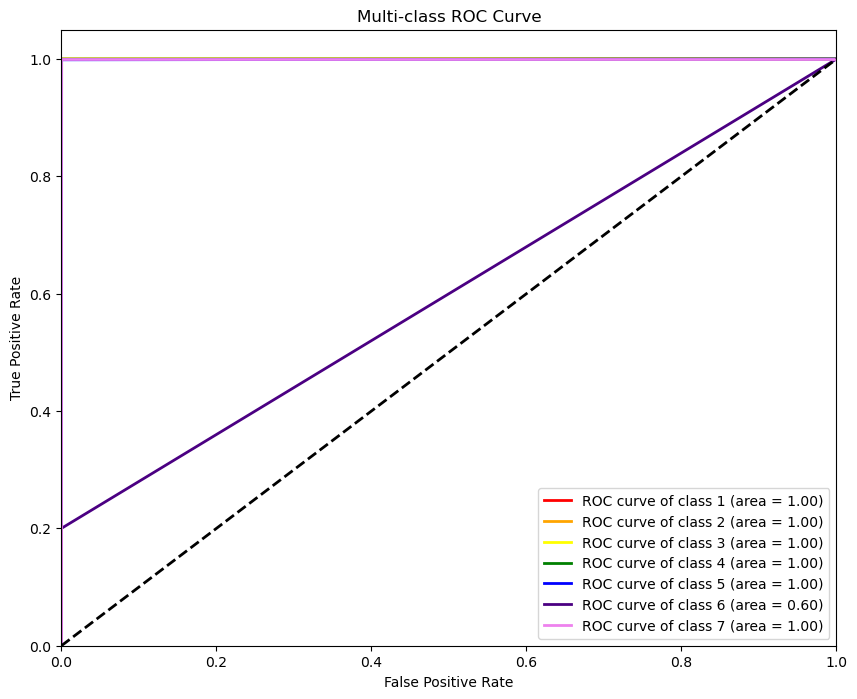

In [26]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for test set
y_prob = d3.predict_proba(X_test)

# Compute ROC curve and AUC for each class
n_classes = len(d3.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == d3.classes_[i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(d3.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [27]:
# Specify model parameters to consider
rf_params = {'n_estimators': [50, 100, 150, 200],
             'criterion': ['gini','entropy'],
             'max_depth': [10,20]
}

In [28]:
# Undertake a repeated k-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=10,
                               cv=5, verbose=5, random_state=123)
rf_search.fit(X_train, y_train)

rf_predictions = rf_search.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=20, n_estimators=200;, score=0.999 total time=   2.5s
[CV 2/5] END criterion=gini, max_depth=20, n_estimators=200;, score=1.000 total time=   2.6s
[CV 3/5] END criterion=gini, max_depth=20, n_estimators=200;, score=1.000 total time=   2.7s
[CV 4/5] END criterion=gini, max_depth=20, n_estimators=200;, score=1.000 total time=   2.5s
[CV 5/5] END criterion=gini, max_depth=20, n_estimators=200;, score=0.999 total time=   2.2s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.999 total time=   1.6s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=1.000 total time=   1.5s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=1.000 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=1.000 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.999 total time=  

c:\Users\malou\anaconda3\envs\ml01\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [29]:
# Check the best estimator and parameters
print('Best model: ', rf_search.best_estimator_)
print('Best parameters: ', rf_search.best_params_)

Best model:  RandomForestClassifier(max_depth=10)
Best parameters:  {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}


In [30]:
# Evaluate on the hold-out
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

[[22792     0     1     0     0     0     0]
 [    0    25     0     0     0     0     0]
 [    0     0    85     0     0     0     0]
 [    0     1     0  4451     0     0     0]
 [    0     0     0     0  1634     0     0]
 [    0     0     0     3     0     2     0]
 [    0     0     3     0     0     0     3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22793
           2       0.96      1.00      0.98        25
           3       0.96      1.00      0.98        85
           4       1.00      1.00      1.00      4452
           5       1.00      1.00      1.00      1634
           6       1.00      0.40      0.57         5
           7       1.00      0.50      0.67         6

    accuracy                           1.00     29000
   macro avg       0.99      0.84      0.89     29000
weighted avg       1.00      1.00      1.00     29000



In [31]:
rf = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50)
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

[[22788     0     5     0     0     0     0]
 [    0    25     0     0     0     0     0]
 [    0     0    85     0     0     0     0]
 [    0     1     0  4451     0     0     0]
 [    0     0     0     0  1634     0     0]
 [    0     0     1     3     0     1     0]
 [    0     0     3     0     0     0     3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22793
           2       0.96      1.00      0.98        25
           3       0.90      1.00      0.95        85
           4       1.00      1.00      1.00      4452
           5       1.00      1.00      1.00      1634
           6       1.00      0.20      0.33         5
           7       1.00      0.50      0.67         6

    accuracy                           1.00     29000
   macro avg       0.98      0.81      0.85     29000
weighted avg       1.00      1.00      1.00     29000



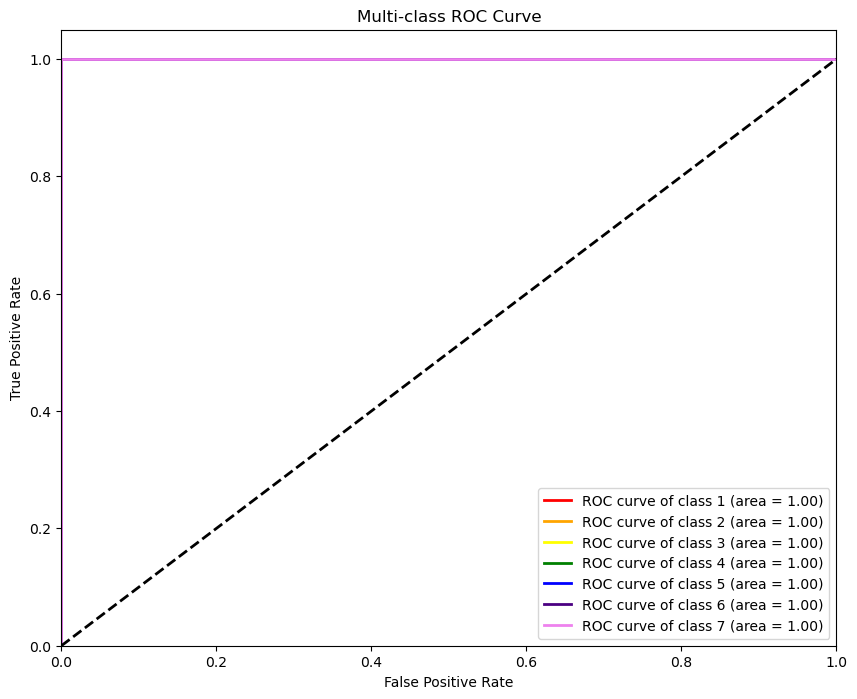

In [32]:
# Predict probabilities for test set
y_prob = rf_search.predict_proba(X_test)

# Compute ROC curve and AUC for each class
n_classes = len(rf_search.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == rf_search.classes_[i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(rf_search.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Model exportation

In [33]:
# Import library for model export
import pickle # Note that pickle is useful to store cleaned datasets and in this export models

# Specify the file path
filepath = os.path.join('models','shuttle_d3.pkl')

# Create folder if it does not exist
os.makedirs(os.path.dirname(filepath), exist_ok=True)

# Save the model
pickle.dump(d3_search, open(filepath, 'wb'))

In [34]:
# Specify the file path
filepath = os.path.join('models','shuttle_rf.pkl')

# Create folder if it does not exist
os.makedirs(os.path.dirname(filepath), exist_ok=True)

# Save the model
pickle.dump(rf_search, open(filepath, 'wb'))